# Hackathon - Project_4 - EDA & Cleaning

## Problem Statement

This project consisted on predicting the probabilities of a person having a wage greater than 50K.

## Executive Summary

### This project consists on 3 parts:

#### EDA & Cleaning
- Importing Libraries
- Read in the csv data file
- Rename Columns
- EDA
- Data Cleanning
    - Dropping duplicates
- Creating target column
- Baseline
- Feature engineering
    - Initial Correlation
    - Male vs Not Male
    - Has Cap Gains
    - Interaction feature education_num * age
    - Prof_Specialty or Exec_Managerial
    - Married vs Not Married
    - Family vs No Family
    - Education = 13, 14, 15, 16
    - Interaction Feature hour_per_week * age
    - Sqauring Education Number
    - Married Man
    - Interaction Feature education_num * marital_status_dummy
    - Interaction Feature education_num * marital_status_dummy
    - Interaction Feature marital_status_dummy * hours_per_week
    - Interaction Feature marital_status_dummy * usa
    - Interaction Feature education_num * is_male
    - Interaction Feature education_num * hours_per_week
    - Interaction Feature age * marital_status_dummy
    - Final Correlation
- To CSV

#### Modeling
- Importing Libraries
- Read in the data csv file
- Feature Selection
- Modeling
    - Model function 1
    - Model function 2
    
#### Modeling
- Importing Libraries
- Read in the test data csv file
- Feature engineering
- Feature Selection
- Modeling
- Read in the train data csv file
- Train Feature Selection
- Predictions
- Save Predictions

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read in the csv data file

In [2]:
df = pd.read_csv("data/large_train_sample.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


### Rename Columns

In [3]:
df.rename(columns = {"education-num": "education_num", "marital-status": "marital_status",
                    "capital-gain": "capital_gain", "capital-loss": "capital_loss",
                    "hours-per-week": "hours_per_week", "native-country": "native_country"}, inplace = True)

### EDA

In [4]:
df.shape

(32561, 14)

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage              0
dtype: int64

In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage              object
dtype: object

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'wage'],
      dtype='object')

In [8]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
df["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [10]:
df["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [11]:
df["education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [12]:
df["education_num"].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [13]:
df.loc[(df["workclass"] == " ?") & (df["occupation"] == " ?")].shape

(1836, 14)

In [14]:
df.loc[(df["workclass"] == " ?") & (df["occupation"] == " ?") & (df["native_country"] == " ?")].shape

(27, 14)

(array([4.4830e+03, 8.6340e+03, 1.0945e+04, 4.3820e+03, 2.5100e+03,
        9.8800e+02, 3.4100e+02, 1.3600e+02, 6.4000e+01, 3.8000e+01,
        1.5000e+01, 5.0000e+00, 5.0000e+00, 5.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  12285.,   85906.,  159527.,  233148.,  306769.,  380390.,
         454011.,  527632.,  601253.,  674874.,  748495.,  822116.,
         895737.,  969358., 1042979., 1116600., 1190221., 1263842.,
        1337463., 1411084., 1484705.]),
 <a list of 20 Patch objects>)

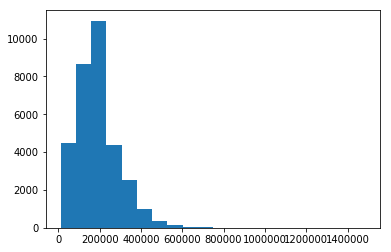

In [15]:
plt.hist(x = df["fnlwgt"], bins = 20)

In [16]:
df.loc[(df["fnlwgt"] > 1200000)]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
8258,35,Private,1226583,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,0,0,52,United-States,>50K
14449,25,Private,1484705,Some-college,10,Divorced,Exec-managerial,Unmarried,Female,0,0,25,United-States,<=50K
15569,29,Private,1268339,HS-grad,9,Married-spouse-absent,Tech-support,Own-child,Male,0,0,40,United-States,<=50K
16739,45,Private,1366120,Assoc-voc,11,Divorced,Other-service,Not-in-family,Female,0,0,8,United-States,<=50K
18138,39,Private,1455435,Assoc-acdm,12,Separated,Craft-repair,Not-in-family,Male,0,0,40,United-States,<=50K


In [17]:
df.loc[(df["fnlwgt"] > 300000)].shape[0] / df.shape[0]

0.13549952397039403

### Data Cleanning

#### Dropping duplicates

In [18]:
df[df.duplicated(keep = False)].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Male,0,0,35,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,Male,0,0,14,United-States,<=50K
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,Male,0,0,40,Mexico,<=50K
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,Female,0,0,10,United-States,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,Male,0,0,40,Mexico,<=50K


In [19]:
df.shape

(32561, 14)

In [20]:
# df.drop_duplicates(inplace = True)
df.shape

(32561, 14)

### Creating target column

In [21]:
df['target'] = df['wage'].map({' <=50K': 0, ' >50K': 1})
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,wage,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K,0


### Baseline

In [22]:
df.target.value_counts(normalize=True)

0    0.75919
1    0.24081
Name: target, dtype: float64

### Feature engineering

#### Initial Correlation

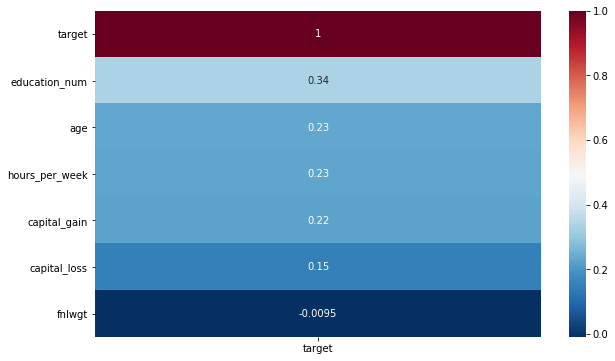

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(data = df.corr()[["target"]].sort_values(by = 'target', ascending=False), annot = True,cmap='RdBu_r');

#### Male vs Not Male

In [24]:
df['is_male'] = df['sex'].map({' Female': 0, ' Male': 1})
df.sample(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,wage,target,is_male
2748,32,Private,281437,Some-college,10,Married-civ-spouse,Transport-moving,Husband,Male,0,0,55,United-States,<=50K,0,1
2518,28,Private,173649,HS-grad,9,Never-married,Other-service,Own-child,Female,0,0,40,?,<=50K,0,0
23876,54,Federal-gov,332243,12th,8,Married-civ-spouse,Adm-clerical,Husband,Male,0,0,40,United-States,<=50K,0,1


#### Has Cap Gains

In [25]:
df['has_cap_gains'] = (df['capital_gain']>0).astype(int)
df.sample(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,wage,target,is_male,has_cap_gains
14643,29,Federal-gov,31161,HS-grad,9,Divorced,Exec-managerial,Not-in-family,Female,0,0,40,United-States,<=50K,0,0,0
6496,20,Private,260199,HS-grad,9,Never-married,Adm-clerical,Own-child,Female,0,0,10,United-States,<=50K,0,0,0
21851,18,?,261276,Some-college,10,Never-married,?,Own-child,Female,0,1602,40,Cambodia,<=50K,0,0,0


#### Interaction feature education_num * age

In [26]:
df["ed_num*age"] = df["education_num"] * df["age"]
df.sample(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,wage,target,is_male,has_cap_gains,ed_num*age
14917,35,Private,113481,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,60,United-States,<=50K,0,1,0,560
19644,50,Private,33304,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,United-States,>50K,1,1,0,450
12529,65,Private,172510,Some-college,10,Widowed,Prof-specialty,Not-in-family,Female,1848,0,20,Hungary,<=50K,0,0,1,650


#### Prof_Specialty or Exec_Managerial

In [27]:
def occ_map(x):
    if x == " Prof-specialty" or x == " Exec-managerial":
        return 1
    else:
        return 0

In [28]:
df["prof_spec_or_manage"] = df["occupation"].map(occ_map)
df.sample(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,wage,target,is_male,has_cap_gains,ed_num*age,prof_spec_or_manage
27493,28,Private,201861,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,45,United-States,<=50K,0,1,0,280,0
24280,82,Self-emp-inc,130329,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States,<=50K,0,1,0,328,0
16471,59,Private,205759,Doctorate,16,Never-married,Prof-specialty,Not-in-family,Male,0,0,50,United-States,<=50K,0,1,0,944,1
31163,29,Self-emp-not-inc,404998,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,90,United-States,<=50K,0,1,0,319,0
28319,19,Private,263338,HS-grad,9,Never-married,Handlers-cleaners,Own-child,Male,0,0,20,United-States,<=50K,0,1,0,171,0


#### Married vs Not Married

In [29]:
# Married = 1
# Not married = 0
df['marital_status_dummy'] = df.marital_status.replace([' Married-civ-spouse', ' Married-AF-spouse'], 1)

df.marital_status_dummy.replace([' Never-married',' Divorced', ' Separated',
                                 ' Widowed', ' Married-spouse-absent'], 0, inplace =True)

df['marital_status_dummy'].value_counts()

0    17562
1    14999
Name: marital_status_dummy, dtype: int64

#### Family vs No Family

In [30]:
df['relationship_dummy'] = df.relationship.replace([' Husband', ' Wife', ' Own-child', ' Other-relative' ], 1)

df.relationship_dummy.replace([' Not-in-family', ' Unmarried'], 0, inplace = True)

df.relationship_dummy.value_counts()

1    20810
0    11751
Name: relationship_dummy, dtype: int64

#### Education = 13, 14, 15, 16

In [31]:
L =[]
for i in range(16):
    m = df.loc[df.education_num == i, 'target'].mean()
    L.append(m)
L

[nan,
 0.0,
 0.03571428571428571,
 0.04804804804804805,
 0.06191950464396285,
 0.05252918287937743,
 0.06645230439442658,
 0.05106382978723404,
 0.07621247113163972,
 0.15950861822683554,
 0.19023453572898094,
 0.26121562952243127,
 0.24835988753514526,
 0.4147525676937442,
 0.5565873476494486,
 0.734375]

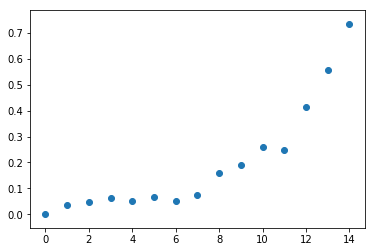

In [32]:
plt.scatter(x=range(15), y=(0.0,
0.03571428571428571,
0.04804804804804805,
0.06191950464396285,
0.05252918287937743,
0.06645230439442658,
0.05106382978723404,
0.07621247113163972,
0.15950861822683554,
0.19023453572898094,
0.26121562952243127,
0.24835988753514526,
0.4147525676937442,
0.5565873476494486,
0.734375))

In [33]:
def edu_map(x):
    if x == 13 or x == 14 or x == 15 or x == 16:
        return 1
    else:
        return 0

In [34]:
df["best_edu"] = df["education_num"].map(edu_map)
df.sample(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,...,native_country,wage,target,is_male,has_cap_gains,ed_num*age,prof_spec_or_manage,marital_status_dummy,relationship_dummy,best_edu
17829,23,Private,103064,Bachelors,13,Never-married,Tech-support,Not-in-family,Female,0,...,United-States,<=50K,0,0,0,299,0,0,0,1
21182,24,Local-gov,187397,Some-college,10,Never-married,Protective-serv,Unmarried,Male,1151,...,United-States,<=50K,0,1,1,240,0,0,0,0
9033,41,Private,233130,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Male,0,...,United-States,>50K,1,1,0,410,0,1,1,0


#### Interaction Feature hour_per_week * age

In [35]:
df["hour_week*age"] = df["hours_per_week"] * df["age"]
df.sample(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,...,wage,target,is_male,has_cap_gains,ed_num*age,prof_spec_or_manage,marital_status_dummy,relationship_dummy,best_edu,hour_week*age
4031,36,Private,183612,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,Male,0,...,>50K,1,1,0,324,1,1,1,0,1440
31519,29,Private,273051,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,...,>50K,1,1,0,377,1,1,1,1,1508
25598,32,Private,230484,7th-8th,4,Separated,Sales,Unmarried,Female,0,...,<=50K,0,0,0,128,0,0,0,0,1120


#### Sqauring Education Number

In [36]:
df['edu_sq']=df['education_num']**2
df.sample(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,...,target,is_male,has_cap_gains,ed_num*age,prof_spec_or_manage,marital_status_dummy,relationship_dummy,best_edu,hour_week*age,edu_sq
2109,66,Private,146454,Some-college,10,Married-civ-spouse,Sales,Husband,Male,5556,...,1,1,1,660,0,1,1,0,2640,100
31640,18,Self-emp-inc,174202,HS-grad,9,Never-married,Transport-moving,Own-child,Male,0,...,0,1,0,162,0,0,1,0,1080,81
19648,44,Private,98466,10th,6,Never-married,Farming-fishing,Unmarried,Male,0,...,0,1,0,264,0,0,0,0,1540,36


#### Married Man

In [37]:
df['married_man']=df['marital_status_dummy']*df['is_male']
df.sample(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,...,is_male,has_cap_gains,ed_num*age,prof_spec_or_manage,marital_status_dummy,relationship_dummy,best_edu,hour_week*age,edu_sq,married_man
9257,19,Without-pay,344858,HS-grad,9,Never-married,Farming-fishing,Own-child,Male,0,...,1,0,171,0,0,1,0,380,81,0
12746,50,Private,138179,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,Male,0,...,1,0,600,0,1,1,0,2000,144,1
30856,57,Private,107443,1st-4th,2,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,...,1,0,114,0,1,1,0,2280,4,1


#### Interaction Feature education_num * marital_status_dummy

In [38]:
df["educ_num*marit_stat"] = df["education_num"] * df["marital_status_dummy"]

#### Interaction Feature education_num * marital_status_dummy

In [39]:
df['married*edu']=df['marital_status_dummy']*df['education_num']

#### Interaction Feature marital_status_dummy * hours_per_week

In [40]:
df['hours_per_week*marital_status_dummy']= df['marital_status_dummy']*df['hours_per_week']

#### Interaction Feature marital_status_dummy * usa

In [41]:
def usa(x):
    if x == " United-States":
        return 1
    else:
        return 0

In [42]:
df["usa"] = df["native_country"].map(usa)

In [43]:
df['married*USA'] = df['marital_status_dummy']*df['usa']

#### Interaction Feature education_num * is_male

In [44]:
df['education_num*is_male'] = df['education_num']*df['is_male']

#### Interaction Feature education_num * hours_per_week

In [45]:
df['education_num*hours_per_week']= df['education_num']*df['hours_per_week']

#### Interaction Feature age * marital_status_dummy

In [46]:
df['age*marital_status']=df['age']*df['marital_status_dummy']

#### Final Correlation

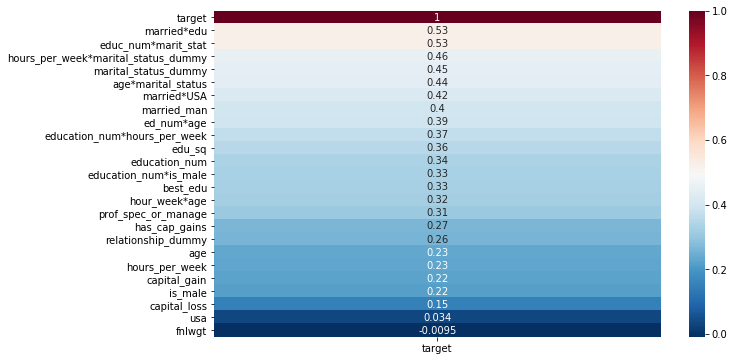

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(data = df.corr()[["target"]].sort_values(by = 'target', ascending=False), annot = True,cmap='RdBu_r');

### To CSV

In [48]:
df.to_csv("data/cleaned_large_train.csv", index = False)